 # Assignment-04-Simple_Linear_Regression1

Q1) Delivery_time -> Predict delivery time using sorting time<br/>
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.<br/>
Dataset: delivery_time.csv

## Import libraries

In [1]:
import pandas as pd
import numpy as np

## Import Data Set


In [2]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA & Visualization

In [3]:
data.shape # 21 rows and 2 columns

(21, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


The given dataset has 21 rows and 2 columns, and both the columns have 21 non null values which indicated that there are no <br/>
null values in the given data set.

### Check for null values in the dataset

In [5]:
data.isnull().sum()  # No null values

Delivery Time    0
Sorting Time     0
dtype: int64

### Rename column name

In [6]:
data = data.rename({'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'}, axis=1)

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

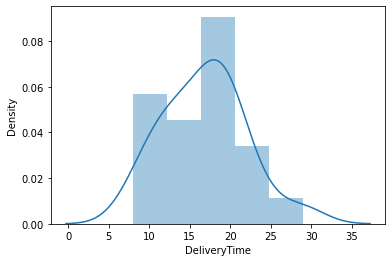

In [7]:
import seaborn as sns
sns.distplot(data['DeliveryTime'])

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

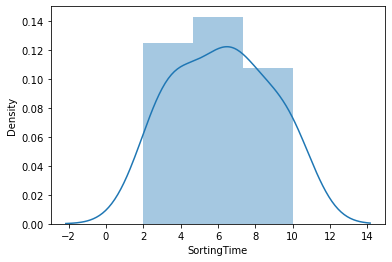

In [8]:
sns.distplot(data['SortingTime'])

## BoxPlot

In [9]:
data.skew()

DeliveryTime    0.352390
SortingTime     0.047115
dtype: float64

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DeliveryTime'>

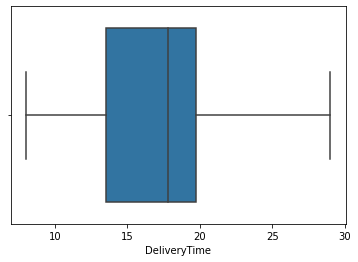

In [10]:
sns.boxplot(data['DeliveryTime']) #-------------Delivery Time---------------------

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SortingTime'>

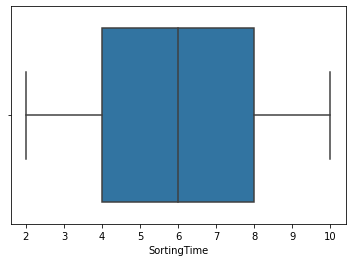

In [11]:
sns.boxplot(data['SortingTime'])  #-------------Sorting Time---------------------

## Correlation Analysis

In [12]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


## Scatterplot

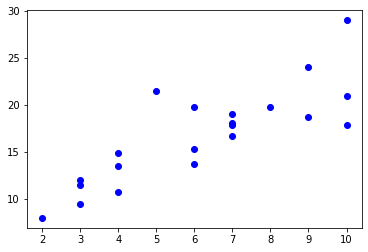

In [13]:
import matplotlib.pyplot as plt
plt.plot(data.SortingTime,data.DeliveryTime,"bo") # x=Sorting Time y=Delivery Time

## Building a Linear Regression model


In [14]:
import statsmodels.formula.api as smf
model = smf.ols('DeliveryTime~SortingTime', data = data).fit()

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

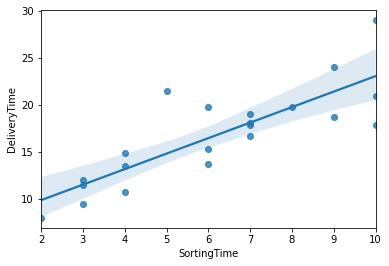

In [15]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=data)

## Model Testing

In [16]:
#Finding Coefficient parameters
model.params  #bo =Intercept b1=Sorting Time 

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [17]:
# Finding tvalues and pvalues
model.tvalues,model.pvalues
print(model.tvalues, '\n', model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [18]:
#R squared values
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

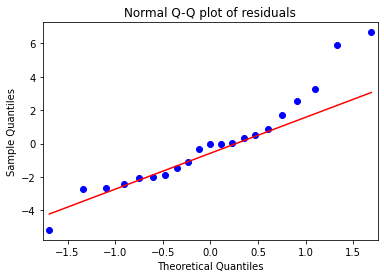

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Introducing Predicted Column in the data set

In [20]:
data['Predicted']= model.fittedvalues
data

,DeliveryTime,SortingTime,Predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


### Introducing Error Column in the data set

In [21]:
model.predict(data) # Prediction of points

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [22]:
data['Error']= data['DeliveryTime']-data['Predicted']
data

,DeliveryTime,SortingTime,Predicted,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


## Manual Model Predictions

In [23]:
# Manual prediction for Row 1 of 10 by equation of linear reg
delivery_time=(6.582734)+( 1.649020)*10  ## y= b0+b1*x ,b0=Intercept b1= SortingTime X= DeliveryTime
delivery_time

23.072933999999997

# Predict for new data points

In [24]:
# Automatic Prediction for Sorting time 12,15
newdata=pd.Series([12,15]) #in form of series
newdata   #Sorting=12,15

0    12
1    15
dtype: int64

In [25]:
new_pred=pd.DataFrame(newdata,columns=['SortingTime'])
new_pred

,SortingTime
0,12
1,15


In [26]:
model.predict(new_pred)

0    26.370973
1    31.318032
dtype: float64